In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [36]:
df = pd.read_csv("House Price India.csv")
print(df.info(), df.head())
print(df.isnull().sum())
df = df.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14619 entries, 0 to 14618
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14619 non-null  int64  
 1   Date                            14619 non-null  int64  
 2   No of bedrooms                  14619 non-null  int64  
 3   No of bathrooms                 14619 non-null  float64
 4   living area                     14619 non-null  int64  
 5   lot area                        14619 non-null  int64  
 6   No of floors                    14619 non-null  float64
 7   waterfront present              14619 non-null  int64  
 8   No of views                     14619 non-null  int64  
 9   house condition                 14619 non-null  int64  
 10  house grade                     14619 non-null  int64  
 11  house area(excluding basement)  14619 non-null  int64  
 12  Area of the basement            

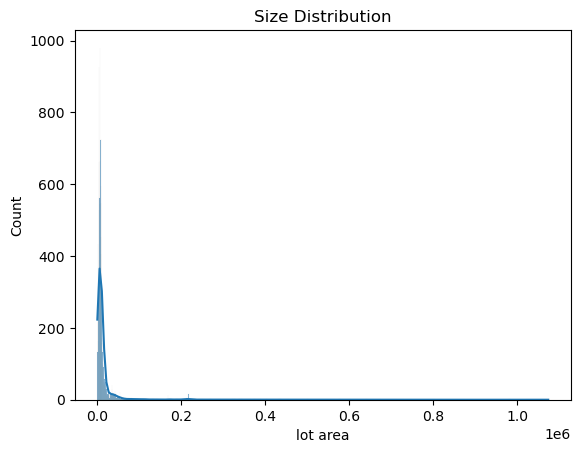

In [37]:
sns.histplot(df['lot area'], kde=True)
plt.title("Size Distribution")
plt.show()

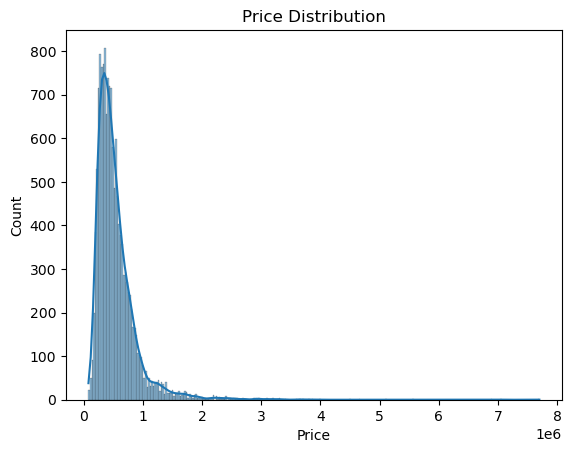

In [38]:
sns.histplot(df['Price'], kde=True)
plt.title("Price Distribution")
plt.show()


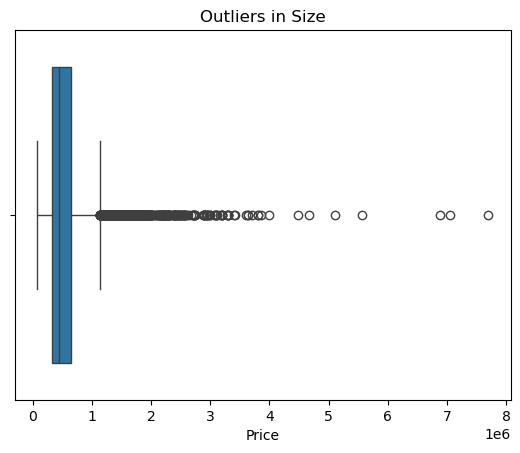

In [39]:
sns.boxplot(x=df['Price'])
plt.title("Outliers in Size")
plt.show()

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [41]:
X = df.drop('Price', axis=1)
y = df['Price']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [44]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [49]:
y_pred = model.predict(X_test)
y_pred

array([ 580634.55334473,  566033.71765137,  451151.34164429, ...,
        792018.83743286,  495210.48397827, 1726093.8364563 ])

In [50]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")


RMSE: 196388.11


In [51]:
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.2f}")

R² Score: 0.74


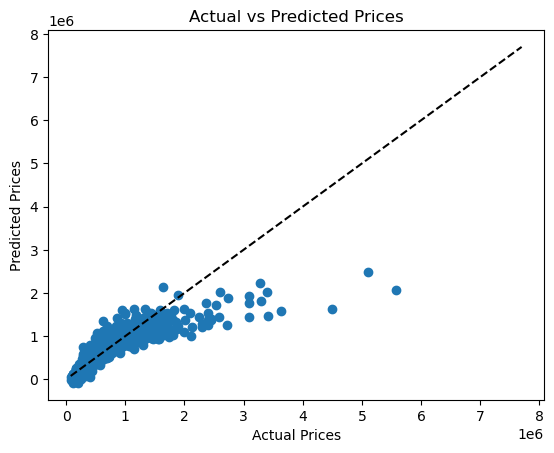

In [48]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.show()